# Tutorial

**author:** Mehmet Can Ay <br>
2023-11-30

## Import

In [1]:
from ppi.database import Database
from ppi.intact_analyzer import IntActAnalyzer

## Get DataFrame From File

### Creating an Instance of Database Class

In [2]:
db = Database()

### Reading the Data

After the creation of Database object, set_path_to_data_file() function must be executed to use the other functions the class offers.

In [3]:
db.set_path_to_data_file(path="../../../tests/data/test_ppi.tsv")

True

In [4]:
db.read_data()

,confidence_value,detection_method,a_uniprot_id,b_uniprot_id,interaction_type,pmid,a_name,a_taxid,b_name,b_taxid
0,0.1,dm1,node_id1,node_id2,it1,pmid1,name_1,1,name_2,1
1,0.2,dm2,node_id2,node_id3,it2,pmid1,name_2,1,name_3,1
2,0.3,dm3,node_id2,node_id4,it2,pmid1,name_2,1,name_4,1
3,0.4,dm1,node_id2,node_id5,it2,pmid1,name_2,1,name_5,1
4,0.5,dm4,node_id5,node_id6,it2,pmid1,name_5,1,name_6,2
5,0.6,dm1,node_id2,node_id6,it3,pmid1,name_2,1,name_6,2
6,0.7,dm5,node_id6,node_id7,it3,pmid1,name_6,2,name_7,1
7,0.8,dm2,node_id2,node_id3,it3,pmid1,name_2,1,name_3,1


### Getting Proteins and Interactions Table

Both functions utilizes read_data() function.

In [5]:
db.get_proteins()

,accession,name,taxid
id,,,
1,node_id1,name_1,1
2,node_id2,name_2,1
3,node_id3,name_3,1
4,node_id4,name_4,1
5,node_id5,name_5,1
6,node_id6,name_6,2
7,node_id7,name_7,1


In [6]:
db.get_interactions()

,confidence_value,detection_method,interaction_type,pmid,protein_a_id,protein_b_id
id,,,,,,
1,0.1,dm1,it1,pmid1,1,2
2,0.2,dm2,it2,pmid1,2,3
3,0.3,dm3,it2,pmid1,2,4
4,0.4,dm1,it2,pmid1,2,5
5,0.5,dm4,it2,pmid1,5,6
6,0.6,dm1,it3,pmid1,2,6
7,0.7,dm5,it3,pmid1,6,7
8,0.8,dm2,it3,pmid1,2,3


### Saving protein and interaction Tables to the SQL Database

This function uses both get_proteins() and get_interactions() functions.

In [7]:
db.import_data()

### Retrieving Table Information From The SQL Database

In [8]:
db.get_table_names()

['interaction', 'protein']

In [9]:
db.get_columns(table="interaction")

['id',
 'confidence_value',
 'detection_method',
 'interaction_type',
 'pmid',
 'protein_a_id',
 'protein_b_id']

In [10]:
db.get_columns(table="protein")

['id', 'accession', 'name', 'taxid']

## Creating a Graph

### Whole Graph

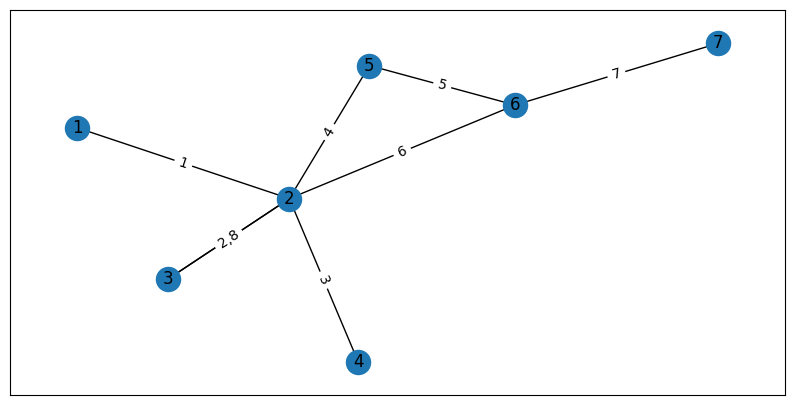

In [11]:
graph = db.get_graph()
iaa = IntActAnalyzer(graph)
iaa.draw_graph()

### Graph Filtration

#### Detection Method

In [12]:
db.get_detection_method_statistics()

,number
detection_method,
dm1,3
dm2,2
dm3,1
dm4,1
dm5,1


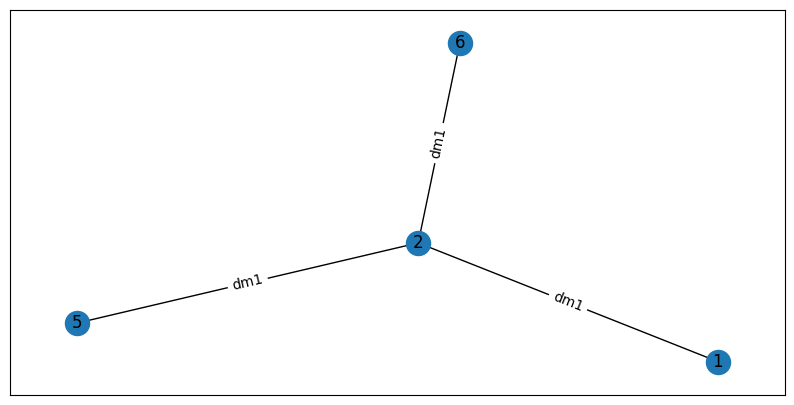

In [13]:
graph = db.get_graph(detection_method='dm1')
iaa = IntActAnalyzer(graph)
iaa.draw_graph(edge_label='detection_method')

#### Confidence Value

Note that the parameter for `get_graph`  is **confidence_value_gte** (= means confidence_value greater than or equals), but the in `draw_graph` **edge_label = 'confidence_value'**

In [14]:
db.get_confidence_value_statistics()

,number
confidence_value,
0.1,1
0.2,1
0.3,1
0.4,1
0.5,1
0.6,1
0.7,1
0.8,1


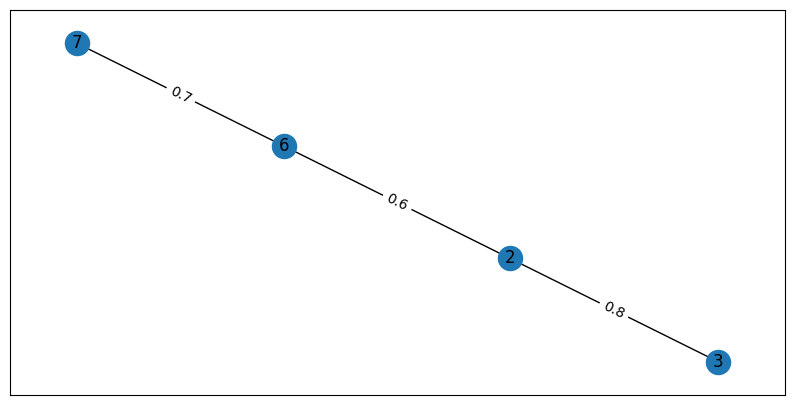

In [15]:
graph = db.get_graph(confidence_value_gte=0.6)
iaa = IntActAnalyzer(graph)
iaa.draw_graph(edge_label='confidence_value')

#### Interaction Type

In [16]:
db.get_interaction_type_statistics()

,number
interaction_type,
it1,1
it2,4
it3,3


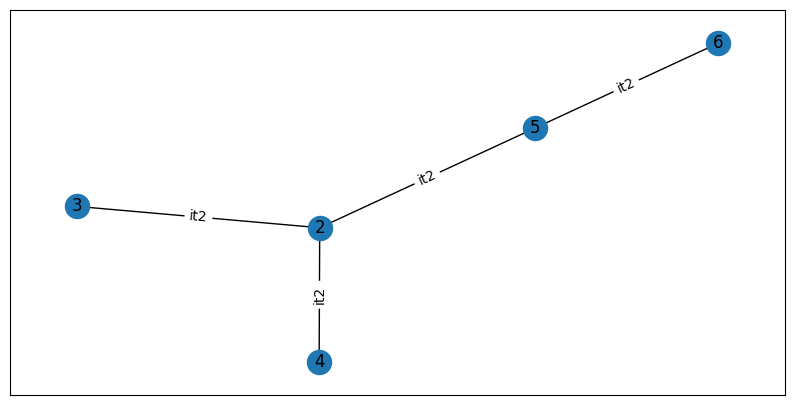

In [17]:
graph = db.get_graph(interaction_type='it2')
iaa = IntActAnalyzer(graph)
iaa.draw_graph(edge_label='interaction_type')

#### PubMed Identifier (PMID)

In [18]:
db.get_pmid_statistics()

,number
pmid,
pmid1,8


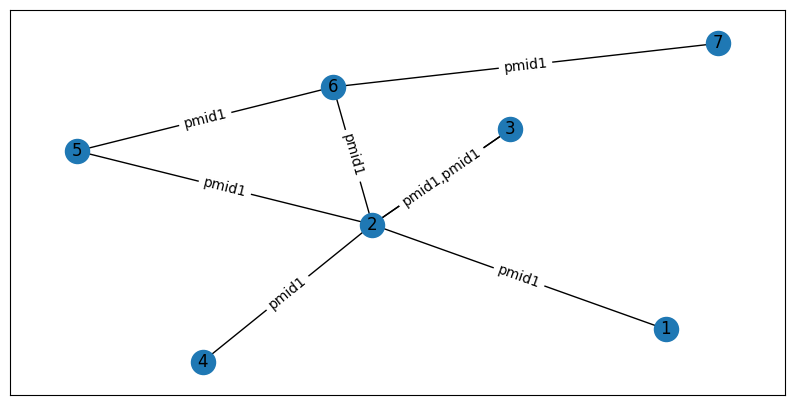

In [19]:
graph = db.get_graph(pmid='pmid1')
iaa = IntActAnalyzer(graph)
iaa.draw_graph(edge_label='pmid')

## IntAct Analyzer

### Protein with the Highest Betweeness Centrality

In [20]:
graph = db.get_graph()
iaa = IntActAnalyzer(graph)
iaa.get_protein_with_highest_bc()

{'accession': 'node_id2',
 'name': 'name_2',
 'taxid': 1,
 'node_id': 2,
 'bc_value': 0.8}

### Neighbor Names

To remember the names of the nodes:

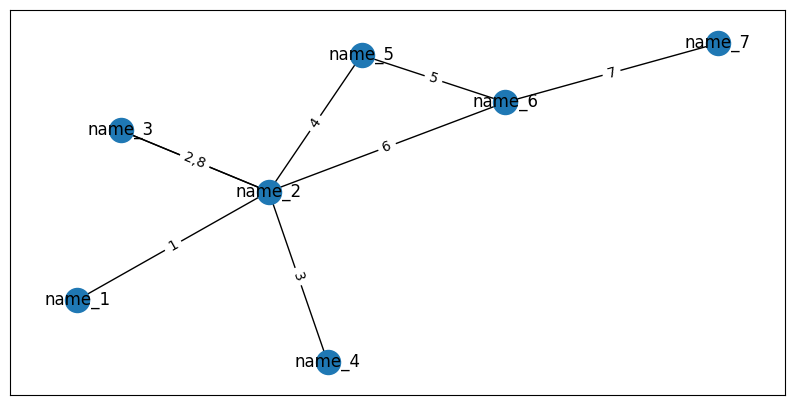

In [21]:
iaa.draw_graph(node_label='name')

In [22]:
iaa.get_neighbors_name('name_5')

['name_2', 'name_6']